In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from PIL import Image

In [20]:
dataset1 = np.loadtxt("asl_numeric.csv",delimiter= ",")
dataset2 = np.loadtxt("asl_alphabet.csv",delimiter= ",")

dataset = np.vstack((dataset1,dataset2))

np.random.shuffle(dataset)

len_dataset = dataset.shape[0]

train = dataset[:int(0.75*len_dataset),:]
X = train[:,:-1]
Y = train[:,-1]
Y = pd.get_dummies(Y)
Y = Y.to_numpy()

test = dataset[int(0.75*len_dataset):,:]
Xt = test[:,:-1]
Yt = test[:,-1]
Yt = pd.get_dummies(Yt)
Yt = Yt.to_numpy()

out_neurons = len(Y[0])

In [21]:
# Data standardization
X = X/255
Xt = Xt/255

In [22]:
ones = np.asmatrix(np.ones(len(X))).T
X = np.hstack((ones,X))
N,p = X.shape

In [23]:
ones_t = np.asmatrix(np.ones(len(Xt))).T
Xt = np.hstack((ones_t,Xt))
Nt,pt = Xt.shape

In [24]:
def sigmoid(a):
    return(1/(1+np.exp(-a)))

In [25]:
# function to calculate (W*X)
def W_x_X(X, W):
    return (np.dot(X,W))

In [26]:
# Softmax function, substracted by max to remove nan values
def softmax(a):
    a_max = np.max(a, axis=-1)
    exp_a = np.exp(a - a_max)
    return exp_a / np.sum(exp_a, axis=-1)

In [27]:
# Cross Entropy Function
def crossEntropy(y_pred, y):
    return - np.sum(np.multiply(np.log(y_pred),(y)),axis=0)

In [28]:
# Calculates Cost
def cost(y_pred,y):
    return np.mean(crossEntropy(y_pred,y))

In [29]:
# Calculates Gradient of Cost
def gradCost(y_pred,y,X):
    N = len(X)
    return ((1/N)*np.dot(X.T,(y_pred - y)))

In [30]:
# Initializing Weight Matrix of size (p,k)   where p = number of features and k = number of classes
#W = np.random.random(size=(23,3))
W = np.random.randn(p,out_neurons)
#W = np.zeros((23,3))

In [31]:
# Applying Gradient Descent 
iterations = 25000
alpha = 0.005
Jj = []
for i in tqdm(range(iterations)):
    inp = W_x_X(X,W)
    y_pred = softmax(inp)
    #print(y_pred,"\n\n\n")
    crossentropy = crossEntropy(y_pred,Y)
    J = cost(y_pred,Y)/N
    Jj.append(J)
    grad = gradCost(y_pred,Y,X)
    W = W - alpha*(grad)
    #print(W,"\n\n\n")
print("The weights after Gradient Descent are \n\n",W)

100%|██████████| 25000/25000 [30:38<00:00, 13.60it/s]

The weights after Gradient Descent are 

 [[ 6.71133073e-01 -7.46876280e-01 -2.39559907e-01 ...  4.13033409e-01
  -1.24671087e+00 -2.27231593e+00]
 [ 5.66123534e-01 -2.80965334e-01 -1.74586173e+00 ...  3.93474538e-01
  -3.15449977e-01 -3.03955164e-01]
 [ 3.48047145e-01 -8.87550427e-01  2.02188879e-01 ...  6.64009363e-01
  -2.62780065e+00  1.31266813e+00]
 ...
 [ 8.03842737e-02  1.07893740e+00 -3.65847130e-01 ... -1.22833108e+00
  -1.62033898e-01  1.52583633e-01]
 [ 8.43166506e-01 -9.20977727e-01  5.27307189e-01 ... -8.96966763e-01
   8.54337088e-01 -3.02481470e-01]
 [ 2.97691569e-02 -1.96103388e+00  6.61060633e-04 ...  1.66617690e+00
  -1.39257546e+00  8.29336713e-01]]


0.00962375226618842


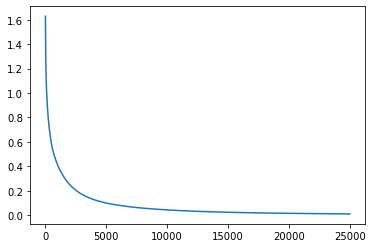

In [32]:
plt.plot(Jj)
print(Jj[-1])

In [33]:
i = 1
print(Y[i])
print(y_pred[i])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[1.61186453e-22 3.05783337e-34 7.68803841e-30 5.19617201e-17
  1.43353629e-24 2.57900117e-26 5.97039709e-19 1.88834435e-36
  7.82275621e-26 1.98972038e-27 1.34617987e-23 6.66825734e-36
  9.01905398e-18 4.08001764e-36 1.00000000e+00 1.89839104e-18
  2.84661296e-44 3.78593768e-36 5.53522077e-22 6.00830025e-35
  1.02902799e-31 1.55619795e-23 2.96754549e-19 2.16289267e-33
  2.84482313e-21 8.27896597e-41 6.37556809e-32 2.72280898e-31
  2.42841325e-19 3.02955221e-23 2.43668106e-38 2.31290441e-35
  1.18752243e-42 1.99878839e-22 8.67708789e-33 1.32604836e-33]]


In [34]:
inp_t = W_x_X(Xt,W)
y_pred_t = softmax(inp_t)
cost(y_pred_t,Yt)/Nt

0.04961285173420521

In [35]:
y_pred_t = np.asmatrix(np.argmax(y_pred_t,axis = 1))
Y_t = np.asmatrix(np.argmax(Yt,axis=1)).T
count = 0
incorrect_list = []
for i in range(len(Y_t)):
    if y_pred_t[i] != Y_t[i]:
        count = count+1
        incorrect_list.append(i)
print("Number of incorrect predictions is",count,"out of",len(Y_t))
print("The accuracy is",(1-count/len(Y_t))*100)

Number of incorrect predictions is 128 out of 630
The accuracy is 79.68253968253968


Actual label  19 Predicted as  25 :


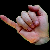

Actual label  35 Predicted as  30 :


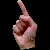

Actual label  5 Predicted as  6 :


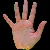

Actual label  6 Predicted as  26 :


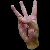

Actual label  31 Predicted as  20 :


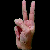

Actual label  9 Predicted as  15 :


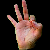

Actual label  4 Predicted as  5 :


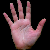

Actual label  25 Predicted as  9 :


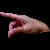

Actual label  6 Predicted as  32 :


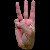

Actual label  5 Predicted as  6 :


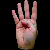

Actual label  11 Predicted as  20 :


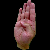

Actual label  30 Predicted as  11 :


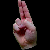

Actual label  8 Predicted as  10 :


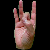

Actual label  31 Predicted as  30 :


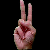

Actual label  8 Predicted as  6 :


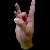

Actual label  20 Predicted as  25 :


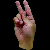

Actual label  23 Predicted as  10 :


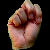

Actual label  32 Predicted as  6 :


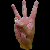

Actual label  31 Predicted as  2 :


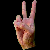

Actual label  12 Predicted as  11 :


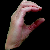

Actual label  27 Predicted as  6 :


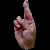

Actual label  20 Predicted as  2 :


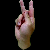

Actual label  2 Predicted as  31 :


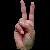

Actual label  0 Predicted as  12 :


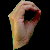

Actual label  32 Predicted as  31 :


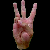

Actual label  20 Predicted as  2 :


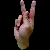

Actual label  5 Predicted as  12 :


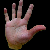

Actual label  7 Predicted as  4 :


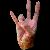

Actual label  8 Predicted as  15 :


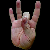

Actual label  28 Predicted as  14 :


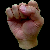

Actual label  6 Predicted as  5 :


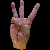

Actual label  28 Predicted as  22 :


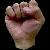

Actual label  3 Predicted as  9 :


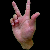

Actual label  18 Predicted as  1 :


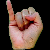

Actual label  4 Predicted as  5 :


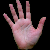

Actual label  11 Predicted as  6 :


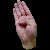

Actual label  20 Predicted as  8 :


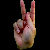

Actual label  10 Predicted as  28 :


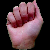

Actual label  14 Predicted as  4 :


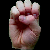

Actual label  4 Predicted as  5 :


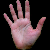

Actual label  0 Predicted as  24 :


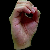

Actual label  16 Predicted as  19 :


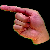

Actual label  13 Predicted as  8 :


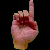

Actual label  23 Predicted as  22 :


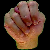

Actual label  29 Predicted as  28 :


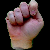

Actual label  5 Predicted as  6 :


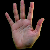

Actual label  1 Predicted as  27 :


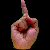

Actual label  18 Predicted as  35 :


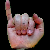

Actual label  0 Predicted as  24 :


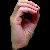

Actual label  5 Predicted as  8 :


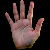

Actual label  5 Predicted as  12 :


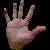

Actual label  30 Predicted as  4 :


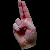

Actual label  32 Predicted as  6 :


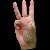

Actual label  13 Predicted as  31 :


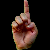

Actual label  5 Predicted as  6 :


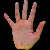

Actual label  31 Predicted as  2 :


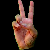

Actual label  24 Predicted as  0 :


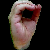

Actual label  15 Predicted as  3 :


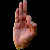

Actual label  18 Predicted as  15 :


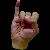

Actual label  31 Predicted as  30 :


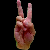

Actual label  10 Predicted as  34 :


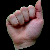

Actual label  0 Predicted as  12 :


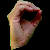

Actual label  19 Predicted as  10 :


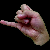

Actual label  0 Predicted as  23 :


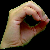

Actual label  21 Predicted as  15 :


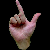

Actual label  13 Predicted as  1 :


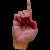

Actual label  20 Predicted as  6 :


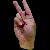

Actual label  12 Predicted as  0 :


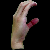

Actual label  28 Predicted as  22 :


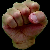

Actual label  17 Predicted as  16 :


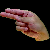

Actual label  7 Predicted as  8 :


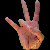

Actual label  27 Predicted as  30 :


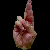

Actual label  6 Predicted as  32 :


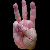

Actual label  20 Predicted as  11 :


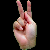

Actual label  5 Predicted as  6 :


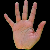

Actual label  1 Predicted as  15 :


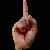

Actual label  0 Predicted as  23 :


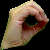

Actual label  2 Predicted as  31 :


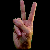

Actual label  18 Predicted as  13 :


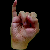

Actual label  35 Predicted as  27 :


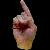

Actual label  17 Predicted as  4 :


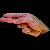

Actual label  30 Predicted as  1 :


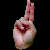

Actual label  7 Predicted as  8 :


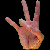

Actual label  1 Predicted as  30 :


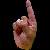

Actual label  23 Predicted as  22 :


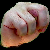

Actual label  2 Predicted as  31 :


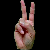

Actual label  27 Predicted as  30 :


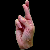

Actual label  13 Predicted as  27 :


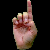

Actual label  23 Predicted as  10 :


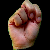

Actual label  18 Predicted as  34 :


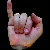

Actual label  6 Predicted as  32 :


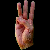

Actual label  16 Predicted as  17 :


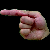

Actual label  30 Predicted as  1 :


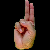

Actual label  27 Predicted as  1 :


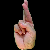

Actual label  10 Predicted as  29 :


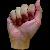

Actual label  14 Predicted as  22 :


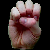

Actual label  18 Predicted as  34 :


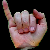

Actual label  6 Predicted as  2 :


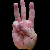

Actual label  4 Predicted as  6 :


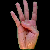

Actual label  22 Predicted as  24 :


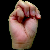

Actual label  3 Predicted as  21 :


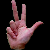

Actual label  20 Predicted as  8 :


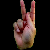

Actual label  31 Predicted as  27 :


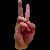

Actual label  6 Predicted as  2 :


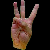

Actual label  28 Predicted as  22 :


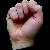

Actual label  4 Predicted as  16 :


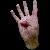

Actual label  0 Predicted as  5 :


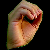

Actual label  6 Predicted as  32 :


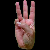

Actual label  35 Predicted as  30 :


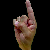

Actual label  35 Predicted as  2 :


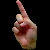

Actual label  5 Predicted as  9 :


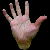

Actual label  13 Predicted as  1 :


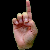

Actual label  30 Predicted as  15 :


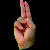

Actual label  10 Predicted as  34 :


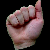

Actual label  17 Predicted as  25 :


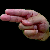

Actual label  0 Predicted as  22 :


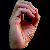

Actual label  31 Predicted as  30 :


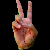

Actual label  9 Predicted as  7 :


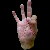

Actual label  2 Predicted as  30 :


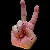

Actual label  2 Predicted as  13 :


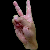

Actual label  6 Predicted as  5 :


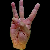

Actual label  23 Predicted as  28 :


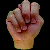

Actual label  22 Predicted as  0 :


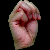

Actual label  22 Predicted as  26 :


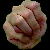

Actual label  35 Predicted as  32 :


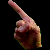

Actual label  19 Predicted as  16 :


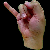

Actual label  6 Predicted as  2 :


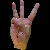

Actual label  27 Predicted as  30 :


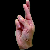

In [36]:
# For displaying the incorrect labels inside Jupyter notebook (PIL image.show() opens the image in external application so this is used)
from IPython.display import display
for i in incorrect_list:
    print("Actual label ",Y_t[i,0],"Predicted as ",y_pred_t[i,0],":")
    display(Image.fromarray(np.uint8((np.asarray(Xt[i,1:])*255).reshape(50,50,3))))